In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status

Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [9]:
#initialize environment, load modules/libraries

import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras

sys.path.append('../')
from geomgen.helpers import gen_grid_image

In [2]:
loaded  = np.load('../data/shapes.npz')
images = loaded['images']/255
labels = loaded['labels'][:,0].astype(int)-2

In [3]:
training = 0.9
len_train = int(training*len(images))

train_images = images[:len_train]
train_labels = labels[:len_train]
test_images = images[len_train:]
test_labels = labels[len_train:]

len_train = int(training*len(train_images))
val_images = train_images[len_train:]
val_labels = train_labels[len_train:]
train_images = train_images[:len_train]
train_labels = train_labels[:len_train]

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=images[0].shape),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 361)               0         
                                                                 
 dense_8 (Dense)             (None, 500)               181000    
                                                                 
 dense_9 (Dense)             (None, 400)               200400    
                                                                 
 dense_10 (Dense)            (None, 200)               80200     
                                                                 
 dense_11 (Dense)            (None, 3)                 603       
                                                                 
Total params: 462,203
Trainable params: 462,203
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(x=train_images, y=train_labels, epochs=50, batch_size=128,validation_data=(val_images, val_labels))

model.save('../data/neural_m3')

Epoch 1/50
633/633 [==============================] - 8s 12ms/step - loss: 0.7846 - accuracy: 0.5986 - val_loss: 0.4266 - val_accuracy: 0.8243
Epoch 2/50
633/633 [==============================] - 7s 11ms/step - loss: 0.4089 - accuracy: 0.8209 - val_loss: 0.2918 - val_accuracy: 0.8827
Epoch 3/50
633/633 [==============================] - 9s 13ms/step - loss: 0.2962 - accuracy: 0.8808 - val_loss: 0.3195 - val_accuracy: 0.8736
Epoch 4/50
633/633 [==============================] - 8s 12ms/step - loss: 0.2608 - accuracy: 0.8968 - val_loss: 0.2299 - val_accuracy: 0.9107
Epoch 5/50
633/633 [==============================] - 13s 20ms/step - loss: 0.2470 - accuracy: 0.9036 - val_loss: 0.2321 - val_accuracy: 0.9144
Epoch 6/50
633/633 [==============================] - 10s 16ms/step - loss: 0.2228 - accuracy: 0.9137 - val_loss: 0.2515 - val_accuracy: 0.9010
Epoch 7/50
633/633 [==============================] - 9s 15ms/step - loss: 0.2244 - accuracy: 0.9140 - val_loss: 0.2025 - val_accuracy: 0.92

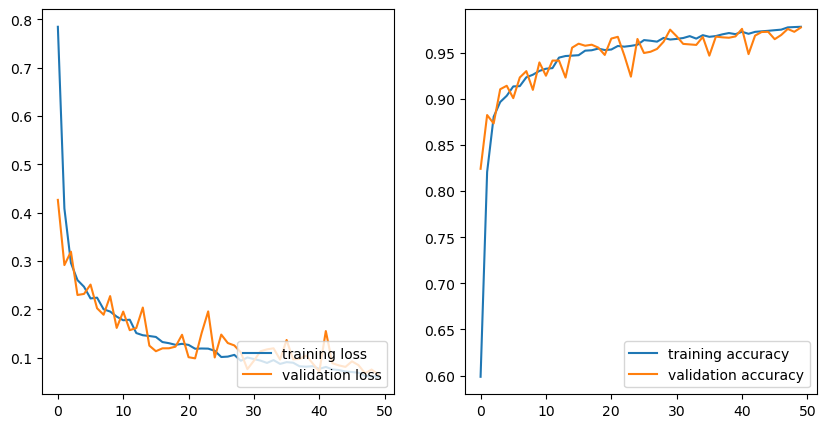

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

In [10]:
model = keras.models.load_model('../data/neural_m3')

train_acc = model.evaluate(train_images, train_labels, batch_size=128)
test_acc= model.evaluate(test_images, test_labels, batch_size=128)

print("\ntraining accuracy : %.3f" % (train_acc[1]))
print("test accuracy : %.3f" % (test_acc[1]))

79/79 [==============================] - 1s 6ms/step - loss: 0.0583 - accuracy: 0.9812

training accuracy : 0.985
test accuracy : 0.981


79/79 [==============================] - 1s 6ms/step

position : target -> fail : [circle, triangle, square]
(0, 0) : 1 -> 2 : [0.183 0.039 0.778]
(0, 1) : 1 -> 2 : [0.003 0.462 0.535]
(0, 2) : 1 -> 0 : [0.853 0.141 0.006]
(0, 3) : 0 -> 2 : [0.306 0.01  0.684]
(0, 4) : 1 -> 2 : [0.    0.004 0.996]
(1, 0) : 1 -> 0 : [0.898 0.082 0.02 ]
(1, 1) : 1 -> 0 : [0.978 0.    0.022]
(1, 2) : 2 -> 0 : [0.923 0.    0.077]
(1, 3) : 2 -> 0 : [0.896 0.    0.104]
(1, 4) : 0 -> 2 : [0.439 0.    0.561]
(2, 0) : 1 -> 2 : [0.001 0.26  0.74 ]
(2, 1) : 2 -> 0 : [0.775 0.    0.225]
(2, 2) : 1 -> 2 : [0.    0.402 0.598]
(2, 3) : 2 -> 1 : [0.    0.854 0.146]
(2, 4) : 1 -> 0 : [0.88  0.112 0.008]
(3, 0) : 0 -> 2 : [0.439 0.001 0.56 ]
(3, 1) : 2 -> 0 : [0.662 0.    0.338]
(3, 2) : 2 -> 1 : [0.  0.7 0.3]
(3, 3) : 2 -> 0 : [0.881 0.059 0.061]
(3, 4) : 1 -> 2 : [0.001 0.187 0.811]


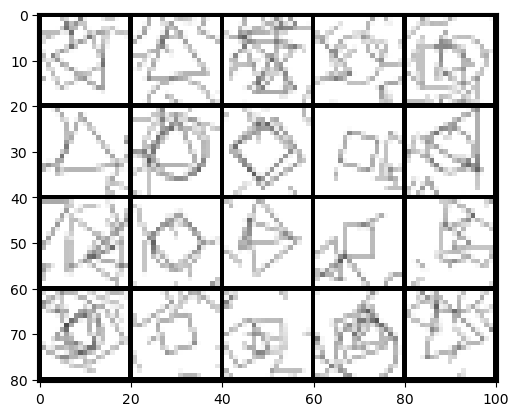

In [12]:
pred = model.predict(test_images, batch_size=128)
pred_labels = np.argmax(pred,1)

fail = np.not_equal(pred_labels,test_labels)
fail_images = test_images[fail]
target_labels = test_labels[fail]
fail_labels = pred_labels[fail]
fail_pred = pred[fail]

grid = (4,5)
grid_image, grid_pos = gen_grid_image(fail_images, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('../data/tmp_fails.png')
plt.close()

print("\nposition : target -> fail : [circle, triangle, square]")

np.set_printoptions(precision=3, suppress=True)
for i in range(grid[1]*grid[0]):
    print(f"{grid_pos[i]} : {target_labels[i]} -> {fail_labels[i]} : {fail_pred[i]}")

plt.imshow(mpimg.imread('../data/tmp_fails.png'))


position : match : [circle, triangle, square]
(0, 0) : 2 : [0. 0. 1.]
(0, 1) : 1 : [0.    0.997 0.003]
(0, 2) : 0 : [1. 0. 0.]
(0, 3) : 2 : [0. 0. 1.]
(0, 4) : 2 : [0.001 0.    0.999]
(1, 0) : 2 : [0.068 0.001 0.931]
(1, 1) : 0 : [1. 0. 0.]
(1, 2) : 1 : [0.029 0.965 0.006]
(1, 3) : 1 : [0.    0.966 0.034]
(1, 4) : 0 : [1. 0. 0.]
(2, 0) : 1 : [0.    0.997 0.002]
(2, 1) : 1 : [0.    0.993 0.007]
(2, 2) : 0 : [0.925 0.    0.075]
(2, 3) : 2 : [0. 0. 1.]
(2, 4) : 2 : [0. 0. 1.]
(3, 0) : 0 : [1. 0. 0.]
(3, 1) : 0 : [1. 0. 0.]
(3, 2) : 0 : [0.99 0.   0.01]
(3, 3) : 2 : [0. 0. 1.]
(3, 4) : 0 : [1. 0. 0.]


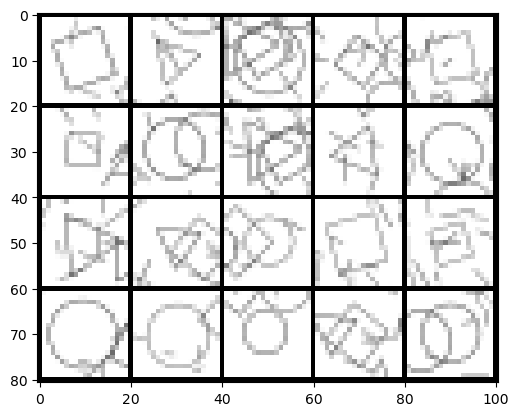

In [13]:
match = np.equal(pred_labels,test_labels)
hit_images = test_images[match]
hit_labels = pred_labels[match]
hit_pred = pred[match]

grid = (4,5)
grid_image, grid_pos = gen_grid_image(hit_images, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('../data/tmp_hits.png')
plt.close()

print("\nposition : match : [circle, triangle, square]")

np.set_printoptions(precision=3, suppress=True)
for i in range(grid[1]*grid[0]):
    print(f"{grid_pos[i]} : {hit_labels[i]} : {hit_pred[i]}")

plt.imshow(mpimg.imread('../data/tmp_hits.png'))